# Lab Risk management

## Imports

For the later we will import the usual libraries :

In [3]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d


In order to have 3D interractive visualization, it is necessary to activate the widget mode of matplotlib

In [5]:
%matplotlib widget

If ipympl is missing, you can install ipympl with the following command line (uncomment first). Be aware that a pip install can broke your python configuration. Use it if you are familiar with such command.

In [ ]:
#!pip install ipympl

## Lab 1 : PCA sandbox

The objectiv of this lab is to study the impact of correlated random variable throug the analysis of its principal components

### Dataset creation

This first step intends to create a set of 3 correlated random variables. We define the number of point to draw, the average and volatility for each random variable.

In [6]:
num_samples = 400

mu = np.array([5.0, 3.0, 10.0])
sigma = np.array([5.0, 3.0, 1.0])

As we intends to have corralated matrix, we will use the following correlation matrix :

In [7]:
correlation_matrix = np.array([
        [  1.00, -0.64, -0.97],
        [ -0.64,  1.00,  0.57],
        [ -0.97,  0.57,  1.00]
    ])

You can visualise the object by directly input its name in a code cell:
    

In [8]:
correlation_matrix

array([[ 1.  , -0.64, -0.97],
       [-0.64,  1.  ,  0.57],
       [-0.97,  0.57,  1.  ]])

You can also use print:

In [9]:
print(correlation_matrix)

[[ 1.   -0.64 -0.97]
 [-0.64  1.    0.57]
 [-0.97  0.57  1.  ]]


We will use a generator of correlated variable that require a covariance matrix. Compute the covariance matrix:

In [10]:
covariance_matrix = correlation_matrix * np.outer(sigma,sigma)
covariance_matrix

array([[25.  , -9.6 , -4.85],
       [-9.6 ,  9.  ,  1.71],
       [-4.85,  1.71,  1.  ]])

Once we have a covariance matrix, we can ask for correlated random variables that follow a normal distribution:

In [11]:
# Generate the random samples.
rng = np.random.default_rng()
dataset = rng.multivariate_normal(mu, covariance_matrix, size=num_samples)

Lets inspect the output:

In [12]:
dataset

array([[ 1.55949962,  6.88294779, 10.37498599],
       [-0.62905157,  0.22895932, 11.27151819],
       [ 2.31389993,  7.1335653 , 10.75578474],
       ...,
       [ 2.81961068,  1.01746099, 10.21960978],
       [ 9.46609429,  0.89076749,  9.10012271],
       [ 9.44107895,  1.00928765,  9.32134327]])

In order to have the dimension of dataset, we can use shape function : 

In [13]:
dataset.shape

(400, 3)

Lets inspect the first element of the dataset variable:

In [14]:
dataset[0]

array([ 1.55949962,  6.88294779, 10.37498599])

If we want the first random variable, we need to ask for all value on the first axis, and ask for the first element on the second variable:

In [15]:
dataset[:,0]

array([ 1.55949962e+00, -6.29051568e-01,  2.31389993e+00,  1.51377212e+00,
        1.50663888e+00, -3.25953560e+00,  1.49776731e+01,  6.41569443e-01,
       -1.24500524e+00,  1.45268390e+01,  1.28917794e+01,  8.58091933e+00,
        3.58052258e-01,  9.98227248e+00,  4.96939411e+00,  4.78914001e+00,
        2.33218537e-01, -1.47770643e+00,  4.72261391e+00,  1.11299384e+01,
        1.13837808e+00, -2.06580125e+00,  6.49769613e+00,  7.60769015e+00,
        7.93163422e+00,  9.31082068e+00,  5.68821572e+00, -8.17920379e-01,
        3.49043774e+00,  5.42816142e+00, -3.29128332e+00,  8.91084092e+00,
        2.57853886e+00,  9.69316444e+00,  1.56703465e+01,  2.57469436e+00,
        3.54491184e+00, -2.72257760e+00,  7.33978092e+00,  5.54772253e+00,
        3.82678426e+00,  4.50372391e+00,  1.13038042e+00, -3.48960195e+00,
        7.67788491e+00,  3.82915510e+00, -1.76113364e+00,  2.03888368e+00,
        8.20280163e+00,  8.79856228e-01,  1.45492869e+01,  2.10346378e+00,
        6.15671217e+00,  

If we only want to retreive the n first elements of the first random variable, we can use the slice operator (":") with a precision of boundaries:

In [16]:
print(dataset[0:10,0])

[ 1.55949962 -0.62905157  2.31389993  1.51377212  1.50663888 -3.2595356
 14.97767305  0.64156944 -1.24500524 14.52683898]


Lets store in x1, y1 and z1 the tree random variables:

In [17]:
x1 = dataset[:,0]
y1 = dataset[:,1]
z1 = dataset[:,2]

Lets plots those variables:

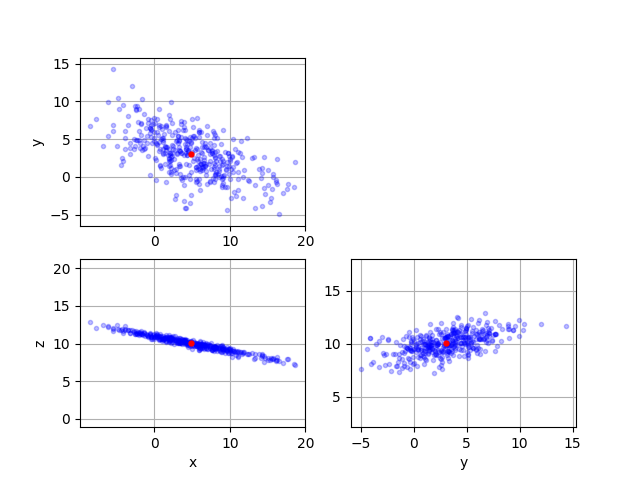

In [18]:
# Plot various projections of the samples.
plt.subplot(2,2,1)
plt.plot(x1, y1, 'b.', alpha=0.25)
plt.plot(x1.mean(), y1.mean(), 'ro', ms=3.5)
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(x1, z1, 'b.', alpha=0.25)
plt.plot(x1.mean(), z1.mean(), 'ro', ms=3.5)
plt.xlabel('x')
plt.ylabel('z')
plt.axis('equal')
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(y1, z1, 'b.', alpha=0.25)
plt.plot(y1.mean(), z1.mean(), 'ro', ms=3.5)
plt.xlabel('y')
plt.axis('equal')
plt.grid(True)

plt.show()

And in 3D:

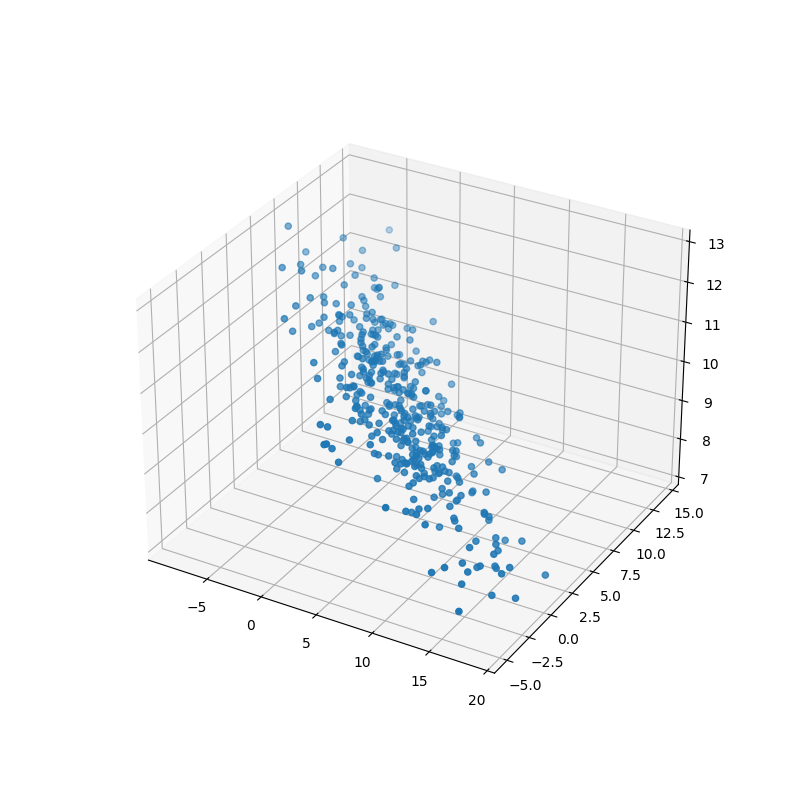

In [19]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, y1, z1)
plt.show()

Lets see if our dataset has the correct properties. Compute the average and standard deviation:

In [20]:
empirical_average = dataset.mean(axis=0)
empirical_average

array([ 4.78804595,  3.04003062, 10.04662392])

In [21]:
empirical_average = dataset.std(axis=0)
empirical_average

array([5.10630056, 2.97829473, 1.02027721])

Now we will normalize our dataset (average = 0 and standard deviation = 1):

In [22]:
normalised_dataset = (dataset - dataset.mean(axis=0))/dataset.std(axis=0)
normalised_dataset

array([[-0.63226719,  1.29030789,  0.32183613],
       [-1.06086539, -0.94385263,  1.20055046],
       [-0.48452808,  1.37445587,  0.69506681],
       ...,
       [-0.38549146, -0.67910325,  0.1695479 ],
       [ 0.91613259, -0.72164219, -0.92769024],
       [ 0.91123367, -0.68184755, -0.71086626]])

Lets verify that our dataset still has the same look:

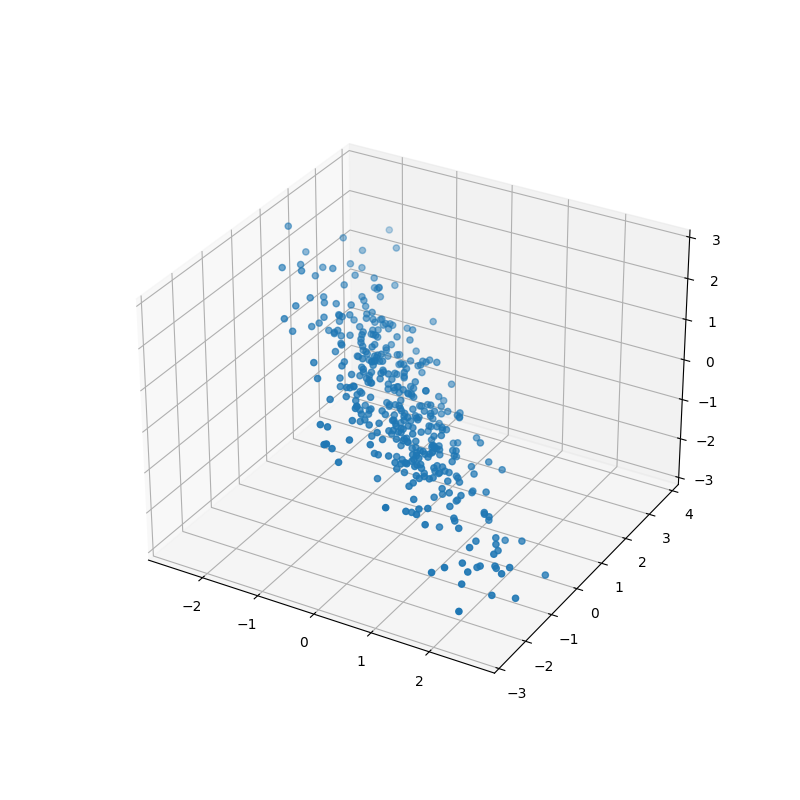

In [23]:
x2, y2, z2 = normalised_dataset[:,0], normalised_dataset[:,1], normalised_dataset[:,2]


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x2, y2, z2)
plt.show()

Now compute the correlation matrix of the normalized dataset:

In [24]:
noramlized_correlation_matrix = np.cov(normalised_dataset, rowvar=False)
noramlized_correlation_matrix

array([[ 1.00250627, -0.61174091, -0.97316812],
       [-0.61174091,  1.00250627,  0.5543338 ],
       [-0.97316812,  0.5543338 ,  1.00250627]])

Then we compute the eigen values and eigen vectors of this normalized correlation matrix. Look in Numpy documentation:

In [25]:
eigen_values, eigen_vectors = np.linalg.eig(noramlized_correlation_matrix)

Lets inspect eigen values:

In [26]:
eigen_values

array([2.44666551, 0.02670993, 0.53414336])

In [27]:
100*eigen_values/sum(eigen_values)

array([81.3516282 ,  0.88810522, 17.76026657])

In [28]:
np.sum(eigen_values)

3.0075187969924797

In [29]:
eigen_vectors

array([[-0.61986454,  0.72468694, -0.30099299],
       [ 0.49598342,  0.06458605, -0.86592672],
       [ 0.60808584,  0.68604481,  0.39946731]])

For ease of usage, we will sort eigen values and vectors by order of magnitude of aigen values:

In [30]:
sorted_index=np.argsort(-eigen_values)
sorted_eigen_values = eigen_values[sorted_index]
sorted_eigen_vectors = eigen_vectors[:,sorted_index]

In [31]:
sorted_eigen_values

array([2.44666551, 0.53414336, 0.02670993])

In [32]:
sorted_eigen_vectors

array([[-0.61986454, -0.30099299,  0.72468694],
       [ 0.49598342, -0.86592672,  0.06458605],
       [ 0.60808584,  0.39946731,  0.68604481]])

Now we choose the number of components:

In [33]:
nb_components = 3


Select only the first nb_components:

In [34]:
sorted_eigen_vectors[:,:nb_components]

array([[-0.61986454, -0.30099299,  0.72468694],
       [ 0.49598342, -0.86592672,  0.06458605],
       [ 0.60808584,  0.39946731,  0.68604481]])

To compute the principal components, multiply the normalised_dataset to the sorted_eigen_vectors. Use nb_components as a filter of number of components.

In [35]:
principal_components = np.matmul(normalised_dataset,sorted_eigen_vectors[:,:nb_components])

Lets check some properties on the principal components:

In [36]:
print(principal_components.mean(axis=0))

[1.88016269e-15 1.79641024e-15 3.18925442e-15]


In [37]:
np.cov(principal_components,rowvar=False)

array([[ 2.44666551e+00, -5.56502769e-18, -4.09029535e-16],
       [-5.56502769e-18,  5.34143356e-01,  4.96400470e-16],
       [-4.09029535e-16,  4.96400470e-16,  2.67099315e-02]])

In [38]:
#np.cov(principal_components,rowvar=False).trace()
print(np.sum(principal_components.std(axis=0)*principal_components.std(axis=0)))

3.000000000000001


No lets reconstruct the original dataset only using the selected components:

In [39]:
reconstructed_dataset= np.matmul(principal_components,np.transpose(sorted_eigen_vectors[:,:nb_components]))

As we have previously normilzed our dataset, lets denormlized the dataset:

In [40]:
reconstructed_dataset_denormalized = reconstructed_dataset * dataset.std(axis=0) + dataset.mean(axis=0)

In [41]:
reconstructed_dataset_denormalized

array([[ 1.55949962,  6.88294779, 10.37498599],
       [-0.62905157,  0.22895932, 11.27151819],
       [ 2.31389993,  7.1335653 , 10.75578474],
       ...,
       [ 2.81961068,  1.01746099, 10.21960978],
       [ 9.46609429,  0.89076749,  9.10012271],
       [ 9.44107895,  1.00928765,  9.32134327]])

In [42]:
dataset

array([[ 1.55949962,  6.88294779, 10.37498599],
       [-0.62905157,  0.22895932, 11.27151819],
       [ 2.31389993,  7.1335653 , 10.75578474],
       ...,
       [ 2.81961068,  1.01746099, 10.21960978],
       [ 9.46609429,  0.89076749,  9.10012271],
       [ 9.44107895,  1.00928765,  9.32134327]])

Lets see the differences between datasets:

In [43]:
reconstructed_dataset_denormalized - dataset

array([[-8.88178420e-16,  1.77635684e-15,  0.00000000e+00],
       [ 1.77635684e-15, -1.77635684e-15,  0.00000000e+00],
       [ 0.00000000e+00,  1.77635684e-15,  0.00000000e+00],
       ...,
       [ 1.33226763e-15, -1.11022302e-15,  0.00000000e+00],
       [ 0.00000000e+00, -4.44089210e-16,  0.00000000e+00],
       [ 0.00000000e+00, -6.66133815e-16,  0.00000000e+00]])

In [44]:
print(np.average(abs(reconstructed_dataset_denormalized - dataset)))

6.900036098045348e-16


And plot the reconstructed dataset

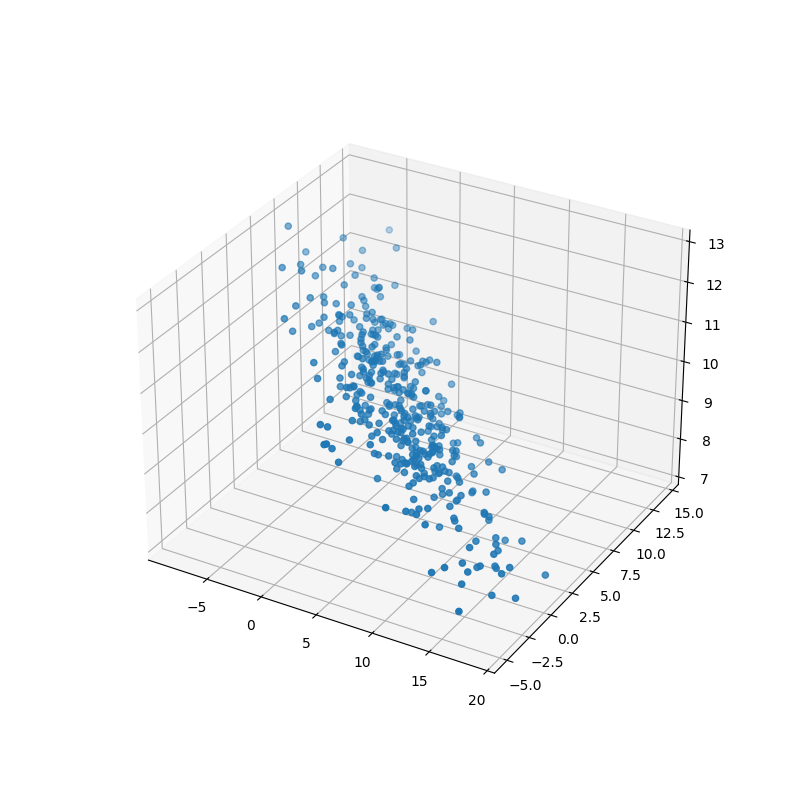

In [45]:
x3, y3, z3 = reconstructed_dataset_denormalized[:,0], reconstructed_dataset_denormalized[:,1], reconstructed_dataset_denormalized[:,2]


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x3, y3, z3)
plt.show()

Last try to modify number of components and observe the effect on the reconstructed dataset

## Lab 2: PCA on equity

We will work on 7 equity index that we will retreive on yahoo fincial:

In [46]:
yahoo_url = 'https://query1.finance.yahoo.com/v7/finance/download/{}?period1=1509235200&period2=1667001600&interval1&events=history'
tickers = ['^GSPC','^FCHI','^FTSE','^NDX','^STOXX50E','^DJI','^IBEX']

In [47]:
df_raw = pd.DataFrame()
for ticker in tickers:
    url = yahoo_url.format(ticker)
    df_tmp = pd.read_csv(url)
    df_tmp['Ticker'] = ticker
    df_raw = pd.concat([df_raw, df_tmp[['Date','Ticker','Adj Close']]])
df_raw.columns = ['date','ticker','price']
df_raw

,date,ticker,price
0,2017-10-30,^GSPC,2572.830078
1,2017-10-31,^GSPC,2575.260010
2,2017-11-01,^GSPC,2579.360107
3,2017-11-02,^GSPC,2579.850098
4,2017-11-03,^GSPC,2587.840088
...,...,...,...
1275,2022-10-24,^IBEX,7680.500000
1276,2022-10-25,^IBEX,7794.899902
1277,2022-10-26,^IBEX,7870.600098
1278,2022-10-27,^IBEX,7921.100098


In [48]:
df_equity = df_raw.pivot_table(index=['date'], columns='ticker', values=['price'])
df_equity

price                                                       \
ticker              ^DJI        ^FCHI        ^FTSE        ^GSPC         ^IBEX   
date                                                                            
2017-10-30  23348.740234  5493.629883  7487.799805  2572.830078  10446.000000   
2017-10-31  23377.240234  5503.290039  7493.100098  2575.260010  10523.500000   
2017-11-01  23435.009766  5514.290039  7488.000000  2579.360107  10506.700195   
2017-11-02  23516.259766  5510.500000  7555.299805  2579.850098  10457.799805   
2017-11-03  23539.189453  5517.970215  7560.399902  2587.840088  10357.799805   
...                  ...          ...          ...          ...           ...   
2022-10-24  31499.619141  6131.359863  7014.000000  3797.340088   7680.500000   
2022-10-25  31836.740234  6250.549805  7013.500000  3859.110107   7794.899902   
2022-10-26  31839.109375  6276.310059  7056.100098  3830.600098   7870.600098   
2022-10-27  32033.279297  6244.029785  7073.700195  3807.300049   7921.100098   
2022-10-28  32861.800781  6273.049805  7047.700195  3901.060059   7916.500000   

                                       
ticker              ^NDX    ^STOXX50E  
date                                   
2017-10-30   6227.589844  3662.179932  
2017-10-31   6248.560059  3673.949951  
2017-11-01   6248.649902  3697.399902  
2017-11-02   6236.390137  3688.800049  
2017-11-03   6295.580078  3689.959961  
...                  ...          ...  
2022-10-24  11430.259766  3527.790039  
2022-10-25  11669.990234  3585.580078  
2022-10-26  11405.900391  3605.310059  
2022-10-27  11191.629883  3604.510010  
2022-10-28  11546.209961  3613.020020  

[1292 rows x 7 columns]

Plot the equities time series directly using pandas:

<AxesSubplot: xlabel='date'>

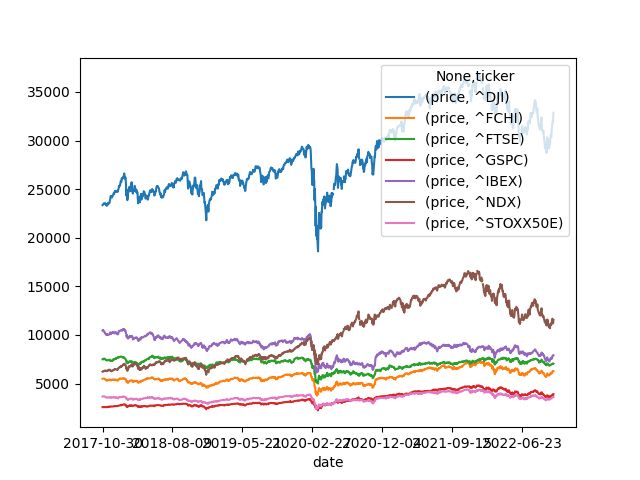

In [49]:
df_equity.plot()

Now, again using pandas, compute daly returns:

In [50]:
df_returns = df_equity["price"].pct_change()[1:]
df_returns

ticker,^DJI,^FCHI,^FTSE,^GSPC,^IBEX,^NDX,^STOXX50E
date,,,,,,,
2017-10-31,0.001221,0.001758,0.000708,0.000944,0.007419,0.003367,0.003214
2017-11-01,0.002471,0.001999,-0.000681,0.001592,-0.001596,0.000014,0.006383
2017-11-02,0.003467,-0.000687,0.008988,0.000190,-0.004654,-0.001962,-0.002326
2017-11-03,0.000975,0.001356,0.000675,0.003097,-0.009562,0.009491,0.000314
2017-11-06,0.000392,-0.001943,0.000251,0.001271,-0.003987,0.002864,-0.002060
...,...,...,...,...,...,...,...
2022-10-24,0.013418,0.015901,0.006356,0.011882,0.017878,0.010604,0.014715
2022-10-25,0.010702,0.019439,-0.000071,0.016267,0.014895,0.020973,0.016381
2022-10-26,0.000074,0.004121,0.006074,-0.007388,0.009712,-0.022630,0.005503


And plot the returns:

<AxesSubplot: xlabel='date'>

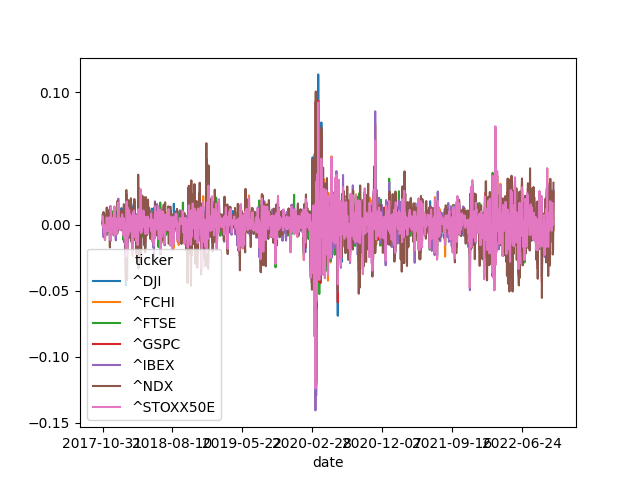

In [51]:
df_returns.plot()

Observe the histogram of returns:

array([[<AxesSubplot: title={'center': '^DJI'}>,
        <AxesSubplot: title={'center': '^FCHI'}>,
        <AxesSubplot: title={'center': '^FTSE'}>],
       [<AxesSubplot: title={'center': '^GSPC'}>,
        <AxesSubplot: title={'center': '^IBEX'}>,
        <AxesSubplot: title={'center': '^NDX'}>],
       [<AxesSubplot: title={'center': '^STOXX50E'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

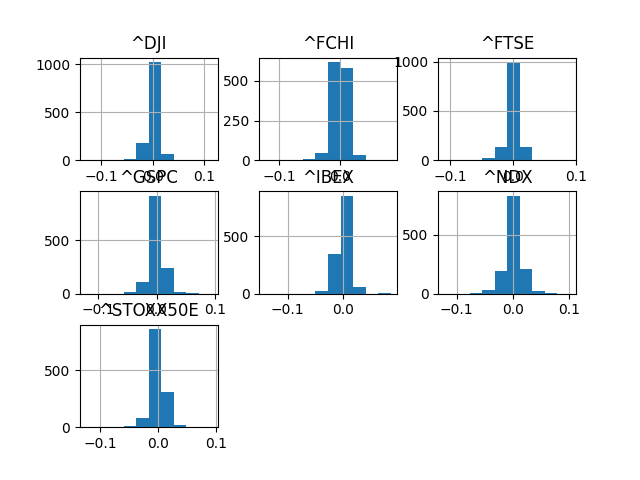

In [52]:
df_returns.hist()

Now, compute the cumulated sum of historical returns:

<AxesSubplot: >

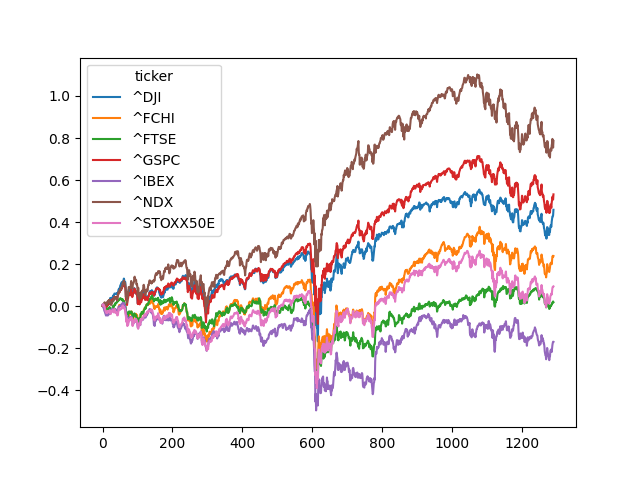

In [53]:
df_cumulated_returns = pd.DataFrame(df_returns.to_numpy().cumsum(axis=0))
df_cumulated_returns.columns = df_returns.columns
df_cumulated_returns.plot()

In [54]:
#df_returns.to_excel("df_equity.xlsx")

Check the average return and associated volatility:

In [55]:
df_returns.mean()

ticker
^DJI         0.000355
^FCHI        0.000185
^FTSE        0.000015
^GSPC        0.000412
^IBEX       -0.000131
^NDX         0.000609
^STOXX50E    0.000073
dtype: float64

In [56]:
df_returns.std()

ticker
^DJI         0.013421
^FCHI        0.012789
^FTSE        0.011072
^GSPC        0.013355
^IBEX        0.012879
^NDX         0.016125
^STOXX50E    0.012881
dtype: float64

Now compute the normalized returns:

In [57]:
df_returns_normalized =  (df_returns - df_returns.mean())/df_returns.std()

<AxesSubplot: xlabel='date'>

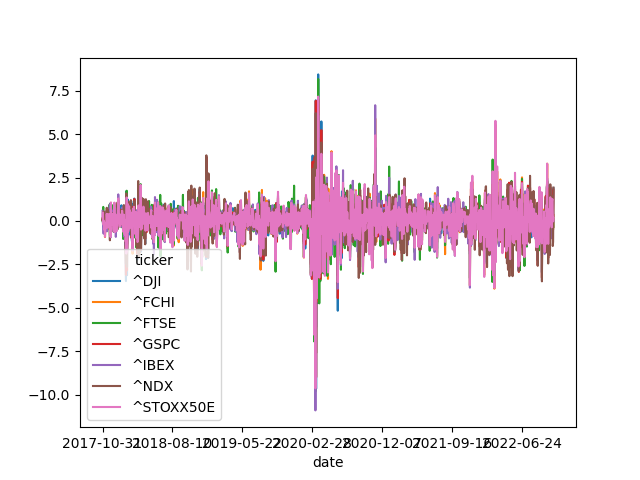

In [58]:
df_returns_normalized.plot()

And average return and volatility:

In [59]:
df_returns_normalized.mean()

ticker
^DJI        -5.503817e-18
^FCHI        5.503817e-18
^FTSE        2.751908e-18
^GSPC       -4.815840e-18
^IBEX       -5.503817e-18
^NDX         1.307156e-17
^STOXX50E    2.751908e-18
dtype: float64

In [60]:
df_returns_normalized.std()

ticker
^DJI         1.0
^FCHI        1.0
^FTSE        1.0
^GSPC        1.0
^IBEX        1.0
^NDX         1.0
^STOXX50E    1.0
dtype: float64

Compute the correlation matrix:

In [61]:
equity_correlation_matrix = df_returns_normalized.corr()

In [62]:
equity_correlation_matrix

ticker,^DJI,^FCHI,^FTSE,^GSPC,^IBEX,^NDX,^STOXX50E
ticker,,,,,,,
^DJI,1.000000,0.620713,0.593276,0.965521,0.603634,0.835297,0.620134
^FCHI,0.620713,1.000000,0.870238,0.592086,0.884961,0.471491,0.974282
^FTSE,0.593276,0.870238,1.000000,0.553733,0.819365,0.416107,0.861936
^GSPC,0.965521,0.592086,0.553733,1.000000,0.556971,0.933337,0.600182
^IBEX,0.603634,0.884961,0.819365,0.556971,1.000000,0.412858,0.889183
^NDX,0.835297,0.471491,0.416107,0.933337,0.412858,1.000000,0.491174
^STOXX50E,0.620134,0.974282,0.861936,0.600182,0.889183,0.491174,1.000000


Lets plot it with seaborn:

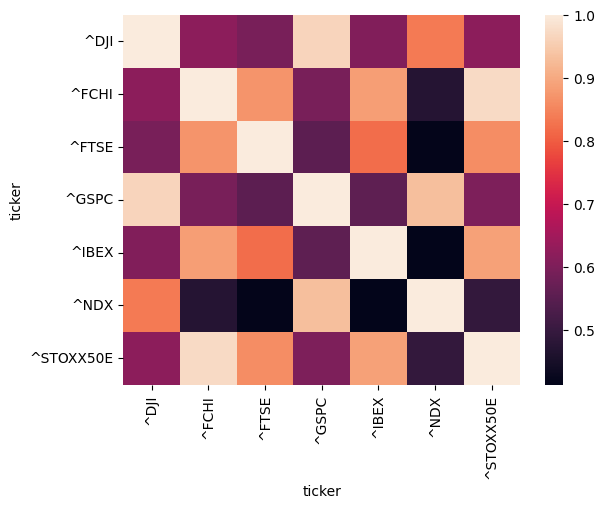

In [63]:
with plt.ioff():
    fig = plt.figure()
    sns.heatmap(equity_correlation_matrix,
            xticklabels=equity_correlation_matrix.columns,
            yticklabels=equity_correlation_matrix.columns)
    display(fig)
    


Now we will extract time series from dataframe to numpy array:

In [64]:
equity_correlation_matrix_np = equity_correlation_matrix.to_numpy()
equity_correlation_matrix_np

array([[1.        , 0.62071289, 0.59327615, 0.96552059, 0.60363416,
        0.83529711, 0.62013431],
       [0.62071289, 1.        , 0.87023826, 0.59208561, 0.88496108,
        0.47149066, 0.97428205],
       [0.59327615, 0.87023826, 1.        , 0.55373319, 0.8193647 ,
        0.41610653, 0.86193635],
       [0.96552059, 0.59208561, 0.55373319, 1.        , 0.55697128,
        0.9333367 , 0.60018198],
       [0.60363416, 0.88496108, 0.8193647 , 0.55697128, 1.        ,
        0.41285845, 0.88918307],
       [0.83529711, 0.47149066, 0.41610653, 0.9333367 , 0.41285845,
        1.        , 0.49117366],
       [0.62013431, 0.97428205, 0.86193635, 0.60018198, 0.88918307,
        0.49117366, 1.        ]])

Computes the eigen values and vectors:

In [65]:
equity_eigen_values, equity_eigen_vectors = np.linalg.eig(equity_correlation_matrix_np)
equity_sorted_index = np.argsort(-equity_eigen_values)
equity_eigen_values_sorted = equity_eigen_values[equity_sorted_index]
equity_eigen_vectors_sorted = equity_eigen_vectors[equity_sorted_index]

In [66]:
100*equity_eigen_values_sorted/equity_eigen_values_sorted.sum()

array([73.96943744, 18.87605165,  2.67903843,  2.48145986,  1.51128422,
        0.3511178 ,  0.13161059])

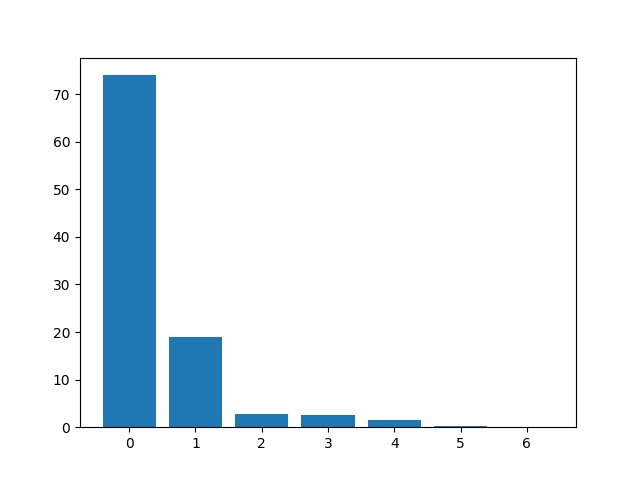

In [67]:
explained_variance = [100*equity_eigen_values_sorted[i]/equity_eigen_values_sorted.sum() for i in range(len(equity_eigen_values_sorted))]
explained_variance
fig = plt.figure()
plt.bar(range(0,len(explained_variance)),explained_variance)
plt.show()

Compute the principal components:

In [68]:
equity_principal_components = np.matmul(df_returns_normalized.to_numpy(),equity_eigen_vectors_sorted)

In [69]:
equity_nb_comp = 7

Reconstruct the returns only using equity_nb_comp:

In [70]:
new_equity_returns = np.matmul(equity_principal_components[:,:equity_nb_comp], np.transpose(equity_eigen_vectors_sorted[:,:equity_nb_comp])) * df_returns.std().to_numpy() + df_returns.mean().to_numpy()

In [71]:
df_new_returns = pd.DataFrame(np.cumsum(new_equity_returns,axis=0))

<AxesSubplot: >

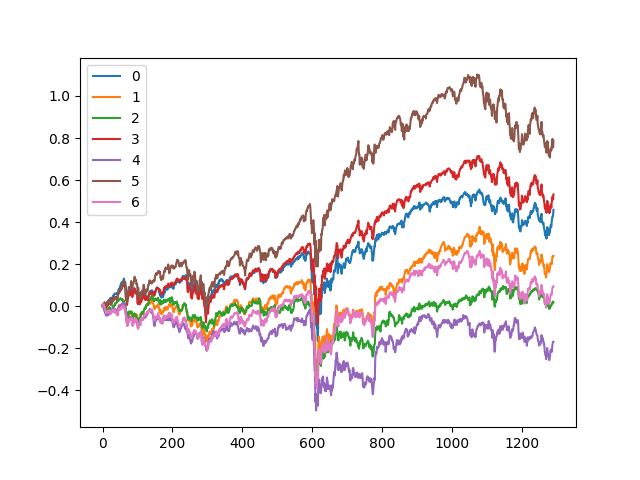

In [72]:
df_new_returns.plot()

<AxesSubplot: >

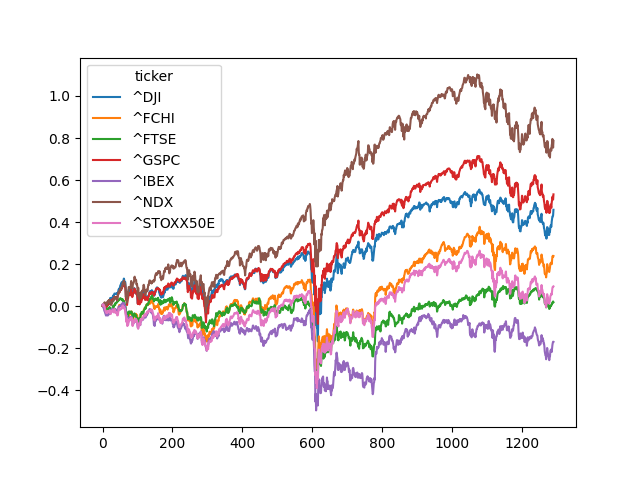

In [73]:
df_cumulated_returns.plot()

Mesure the error:

In [74]:
abs(df_returns-new_equity_returns).sum().sum()

3.4084460277252707e-13

In [75]:
outTab = []

for nb in range(1,len(df_returns.columns)+1):
    temp_equity_returns = np.matmul(equity_principal_components[:,:nb], np.transpose(equity_eigen_vectors_sorted[:,:nb])) * df_returns.std().to_numpy() + df_returns.mean().to_numpy()
    outTab.append([nb,abs(df_returns-temp_equity_returns).sum().sum()])

In [76]:
outTab

[[1, 43.54180157039977],
 [2, 40.430162692328594],
 [3, 37.40097077724078],
 [4, 34.17306972866268],
 [5, 21.82676724365704],
 [6, 15.981988204646571],
 [7, 3.4084460277252707e-13]]

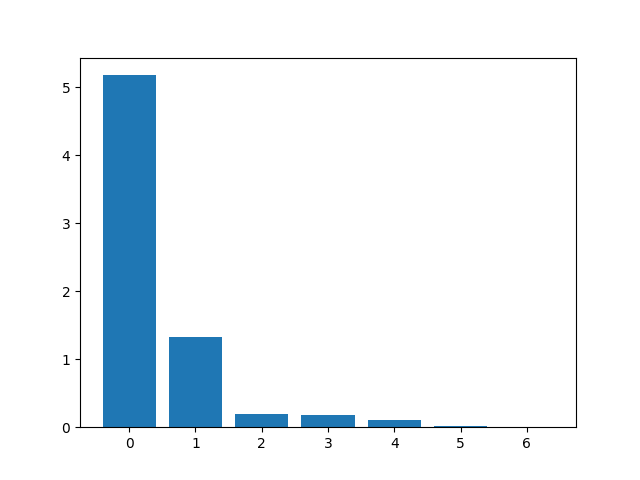

In [77]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
out_pca = pca.fit_transform(df_returns_normalized)

fig = plt.figure()
plt.bar(range(0,len(pca.explained_variance_)),pca.explained_variance_)
plt.show()

# Lab 3: PCA on yield curve

<AxesSubplot: xlabel='Date'>

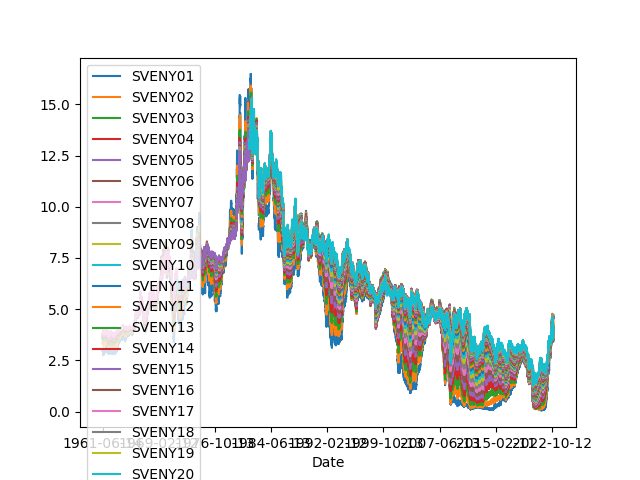

In [78]:
#pd.read_csv("https://www.federalreserve.gov/data/yield-curve-tables/feds200628.csv")

try:
    from urllib.request import Request, urlopen  # Python 3
except ImportError:
    from urllib2 import Request, urlopen  # Python 2

req = Request("https://www.federalreserve.gov/data/yield-curve-tables/feds200628.csv")
req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
content = urlopen(req)

df = pd.read_csv(content,skiprows=9)
df = df.set_index("Date")
for column in df.columns:
    if column[:5] != "SVENY":
        df=df.drop(column,axis=1)
df.plot()


In [79]:
df = df.fillna(method='ffill')

<AxesSubplot: xlabel='Date'>

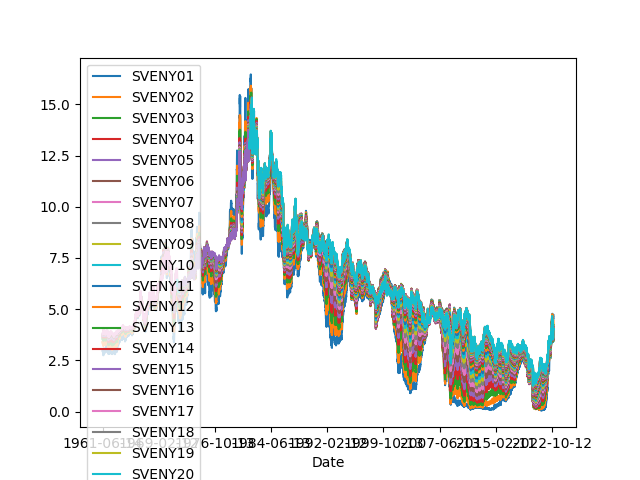

In [80]:
df.plot()